# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/nationalparkservice/park-biodiversity

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
# Importing pandas, numpy, and seaborn.

import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the parks CSV.

parks = pd.read_csv("parks.csv")

In [3]:
# Reading the species CSV. FYI: When I use the code __species = pd.read_csv("species.csv")__ I receive the error:
#  "DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False."

species = pd.read_csv("species.csv", dtype={"Species ID":str, "Park Name":str, "Category":str, "Order":str, "Family":str, "Scientific Name":str, "Common Names":str, "Record Status":str, "Occurrence":str, "Nativeness": str, "Abundance":str, "Seasonality":str, "Conservation Status":str,"Unnamed: 13":str})

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [4]:
# Previewing the parks dataset.

parks

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08
5,BLCA,Black Canyon of the Gunnison National Park,CO,32950,38.57,-107.72
6,BRCA,Bryce Canyon National Park,UT,35835,37.57,-112.18
7,CANY,Canyonlands National Park,UT,337598,38.20,-109.93
8,CARE,Capitol Reef National Park,UT,241904,38.20,-111.17
9,CAVE,Carlsbad Caverns National Park,NM,46766,32.17,-104.44


In [5]:
# Using .info() to preview columns, non-null counts, and data types.

parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Park Code  56 non-null     object 
 1   Park Name  56 non-null     object 
 2   State      56 non-null     object 
 3   Acres      56 non-null     int64  
 4   Latitude   56 non-null     float64
 5   Longitude  56 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.8+ KB


In [6]:
# Using .describe() to preview basic statistics.

parks.describe(include = 'all')

,Park Code,Park Name,State,Acres,Latitude,Longitude
count,56,56,56,5.600000e+01,56.000000,56.000000
unique,56,56,27,NaN,NaN,NaN
top,ACAD,Acadia National Park,AK,NaN,NaN,NaN
freq,1,1,8,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.279291e+05,41.233929,-113.234821
std,NaN,NaN,NaN,1.709258e+06,10.908831,22.440287
min,NaN,NaN,NaN,5.550000e+03,19.380000,-159.280000
25%,NaN,NaN,NaN,6.901050e+04,35.527500,-121.570000
50%,NaN,NaN,NaN,2.387645e+05,38.550000,-110.985000
75%,NaN,NaN,NaN,8.173602e+05,46.880000,-103.400000


In [7]:
# Using .isnull() to determine the number of null values across columns.

parks.isnull().sum()

Park Code    0
Park Name    0
State        0
Acres        0
Latitude     0
Longitude    0
dtype: int64

In [8]:
# Checking on duplicates.

parks_dupes = parks.duplicated().sum()

parks_dupes

0

In [9]:
# Checking out the number of unique values for each column.

parks.nunique()

Park Code    56
Park Name    56
State        27
Acres        55
Latitude     53
Longitude    55
dtype: int64

In [10]:
# Checking out the largest parks by acreage.

parks.nlargest(10,'Acres')

,Park Code,Park Name,State,Acres,Latitude,Longitude
52,WRST,Wrangell - St Elias National Park and Preserve,AK,8323148,61.00,-142.00
18,GAAR,Gates Of The Arctic National Park and Preserve,AK,7523898,67.78,-153.30
15,DEVA,Death Valley National Park,"CA, NV",4740912,36.24,-116.82
32,KATM,Katmai National Park and Preserve,AK,3674530,58.50,-155.00
14,DENA,Denali National Park and Preserve,AK,3372402,63.33,-150.50
20,GLBA,Glacier Bay National Park and Preserve,AK,3224840,58.50,-137.00
35,LACL,Lake Clark National Park and Preserve,AK,2619733,60.97,-153.42
53,YELL,Yellowstone National Park,"WY, MT, ID",2219791,44.60,-110.50
34,KOVA,Kobuk Valley National Park,AK,1750717,67.55,-159.28
17,EVER,Everglades National Park,FL,1508538,25.32,-80.93


In [11]:
# Previewing the species dataset.

species

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119243,ZION-2791,Zion National Park,Vascular Plant,Solanales,Solanaceae,Solanum triflorum,Cut-Leaf Nightshade,Approved,Present,Native,Uncommon,NaN,NaN,NaN
119244,ZION-2792,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis arizonica,Canyon Grape,Approved,Present,Native,Uncommon,NaN,NaN,NaN
119245,ZION-2793,Zion National Park,Vascular Plant,Vitales,Vitaceae,Vitis vinifera,Wine Grape,Approved,Present,Not Native,Uncommon,NaN,NaN,NaN
119246,ZION-2794,Zion National Park,Vascular Plant,Zygophyllales,Zygophyllaceae,Larrea tridentata,Creosote Bush,Approved,Present,Native,Rare,NaN,NaN,NaN


In [12]:
# Using .info() to preview columns, non-null counts, and data types.

species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119248 entries, 0 to 119247
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Species ID           119248 non-null  object
 1   Park Name            119248 non-null  object
 2   Category             119248 non-null  object
 3   Order                117776 non-null  object
 4   Family               117736 non-null  object
 5   Scientific Name      119248 non-null  object
 6   Common Names         119248 non-null  object
 7   Record Status        119248 non-null  object
 8   Occurrence           99106 non-null   object
 9   Nativeness           94203 non-null   object
 10  Abundance            76306 non-null   object
 11  Seasonality          20157 non-null   object
 12  Conservation Status  4718 non-null    object
 13  Unnamed: 13          5 non-null       object
dtypes: object(14)
memory usage: 12.7+ MB


In [13]:
# Looks like there are quite a few null values. Using .isnull() to determine the number of null values across 
# columns.

species.isnull().sum()

Species ID                  0
Park Name                   0
Category                    0
Order                    1472
Family                   1512
Scientific Name             0
Common Names                0
Record Status               0
Occurrence              20142
Nativeness              25045
Abundance               42942
Seasonality             99091
Conservation Status    114530
Unnamed: 13            119243
dtype: int64

In [14]:
# Looking at percentages of null values by column.

percent_missing_species = species.isnull().sum() * 100 / len(species)

percent_missing_species

Species ID              0.000000
Park Name               0.000000
Category                0.000000
Order                   1.234402
Family                  1.267946
Scientific Name         0.000000
Common Names            0.000000
Record Status           0.000000
Occurrence             16.890849
Nativeness             21.002449
Abundance              36.010667
Seasonality            83.096572
Conservation Status    96.043540
Unnamed: 13            99.995807
dtype: float64

In [15]:
# Checking on duplicates

species_dupes = species.duplicated().sum()

species_dupes

0

In [16]:
# Using .describe() to preview basic statistics of the numerical data.

species.describe(include = 'all')

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
count,119248,119248,119248,117776,117736,119248,119248,119248,99106,94203,76306,20157,4718,5
unique,119248,56,14,554,2332,46022,35826,54,7,5,8,24,11,3
top,ACAD-1000,Great Smoky Mountains National Park,Vascular Plant,Poales,Asteraceae,Falco peregrinus,None,Approved,Present,Native,Unknown,Breeder,Species of Concern,Threatened
freq,1,6623,65221,11453,8843,56,27147,86254,83278,75950,28119,12214,3843,2


In [17]:
# Checking the number of unique values for each column.

species.nunique()

Species ID             119248
Park Name                  56
Category                   14
Order                     554
Family                   2332
Scientific Name         46022
Common Names            35826
Record Status              54
Occurrence                  7
Nativeness                  5
Abundance                   8
Seasonality                24
Conservation Status        11
Unnamed: 13                 3
dtype: int64

In [18]:
# Determining the number of species identified in each park. Previewing my data manipulation / business question.

species[['Park Name']].groupby('Park Name').value_counts()

Park Name
Acadia National Park                              1709
Arches National Park                              1048
Badlands National Park                            1389
Big Bend National Park                            2269
Biscayne National Park                            1726
Black Canyon of the Gunnison National Park        1106
Bryce Canyon National Park                        1286
Canyonlands National Park                         1223
Capitol Reef National Park                        1566
Carlsbad Caverns National Park                    1536
Channel Islands National Park                     1885
Congaree National Park                            2321
Crater Lake National Park                         3760
Cuyahoga Valley National Park                     1941
Death Valley National Park                        4439
Denali National Park and Preserve                 1320
Dry Tortugas National Park                         848
Everglades National Park                          2084


In [19]:
# Record Status has too many unique values. Taking a look at their values.

species['Record Status'].value_counts()

# Record Status should only be Approved, In Review, or None. Several rows are corrupted. 
# Will need to tackle this in data cleaning. 

Approved                86254
In Review               32937
None                        6
 Willowherb                 1
 Devil's Shoelaces          1
 Verdolagas                 1
 Chico                      1
 Skyrocket Gilia            1
 Grass-Leaf Loco            1
 Golden Pea                 1
 Storksbill                 1
 Cranesbill                 1
 Speedwell                  1
 Common Mullein             1
 Downy Chess                1
 Wiregrass                  1
 Leather Flower             1
 Shadbush                   1
 Wild Rose                  1
 Skunkbush                  1
 Clover Bush                1
 Kinnikinnick               1
 Filaree                    1
 Liver Leaf*                1
 *                          1
 Whortleberry               1
 Claret Cup                 1
 Goosefoot                  1
 Cenizo                     1
 Bluebell                   1
 Purple Cockle              1
 Dames Rocket               1
 Manati                     1
 Ranchers'

In [20]:
# Checking out what species categories have been observed. 

species['Category'].value_counts()

Vascular Plant         65221
Bird                   14601
Insect                 14349
Fungi                   6203
Nonvascular Plant       4278
Fish                    3956
Mammal                  3867
Invertebrate            1566
Reptile                 1343
Algae                    976
Slug/Snail               787
Spider/Scorpion          776
Amphibian                743
Crab/Lobster/Shrimp      582
Name: Category, dtype: int64

In [21]:
# Checking out the Conservation Status. 

species['Conservation Status'].value_counts()

# Some of these are incorrect due to the aforementioned corrupted rows. 
# E.g., "Breeder" should be in the "Seasonlity" column.

Species of Concern     3843
Endangered              374
Under Review            194
Threatened              184
In Recovery              77
Proposed Endangered      24
Proposed Threatened       7
Breeder                   7
Resident                  5
Migratory                 2
Extinct                   1
Name: Conservation Status, dtype: int64

In [22]:
# Checking out the distribution of species categories that have been observed. 

species['Scientific Name'].value_counts().sort_values()

Potentilla intermedia           1
Euphilotes enoptes bayensis     1
Euphilotes                      1
Callophrys johnsoni             1
Thorybes                        1
                               ..
Accipiter striatus             54
Pandion haliaetus              54
Tachycineta bicolor            54
Circus cyaneus                 55
Falco peregrinus               56
Name: Scientific Name, Length: 46022, dtype: int64

In [23]:
# Previewing the data manipulation I'll do later. In this case, the number of species per acre. 

Acadia_species = len(species[species["Park Name"]=="Acadia National Park"])
Acadia_acre = parks.loc[parks['Park Name'] == 'Acadia National Park', 'Acres']
Acadia_species_per_acre = Acadia_species/Acadia_acre

print(Acadia_species_per_acre)

0    0.036062
Name: Acres, dtype: float64


In [24]:
# Previewing the data manipulation I'll do later. In this case, the number of 
# plant / animal categories recorded at each park. 
# Mostly interested in the parks that have many mammal and bird species. 

species.groupby("Park Name")["Category"].value_counts().unstack()

Category,Algae,Amphibian,Bird,Crab/Lobster/Shrimp,Fish,Fungi,Insect,Invertebrate,Mammal,Nonvascular Plant,Reptile,Slug/Snail,Spider/Scorpion,Vascular Plant
Park Name,,,,,,,,,,,,,,
Acadia National Park,NaN,15.0,364.0,NaN,38.0,NaN,NaN,NaN,55.0,NaN,11.0,NaN,NaN,1226.0
Arches National Park,NaN,8.0,205.0,NaN,11.0,NaN,NaN,NaN,59.0,NaN,20.0,NaN,NaN,745.0
Badlands National Park,NaN,10.0,239.0,NaN,24.0,173.0,239.0,1.0,64.0,NaN,13.0,NaN,1.0,625.0
Big Bend National Park,NaN,13.0,415.0,NaN,53.0,NaN,NaN,NaN,89.0,48.0,62.0,NaN,NaN,1589.0
Biscayne National Park,NaN,8.0,233.0,NaN,818.0,NaN,11.0,34.0,28.0,NaN,40.0,NaN,NaN,554.0
Black Canyon of the Gunnison National Park,NaN,2.0,175.0,NaN,16.0,NaN,NaN,NaN,67.0,NaN,11.0,NaN,NaN,835.0
Bryce Canyon National Park,NaN,4.0,217.0,NaN,1.0,NaN,NaN,NaN,76.0,NaN,13.0,NaN,NaN,975.0
Canyonlands National Park,NaN,7.0,220.0,NaN,33.0,NaN,NaN,NaN,76.0,NaN,22.0,NaN,NaN,865.0
Capitol Reef National Park,NaN,6.0,248.0,NaN,15.0,NaN,NaN,NaN,73.0,NaN,21.0,NaN,NaN,1203.0


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<Axes: >

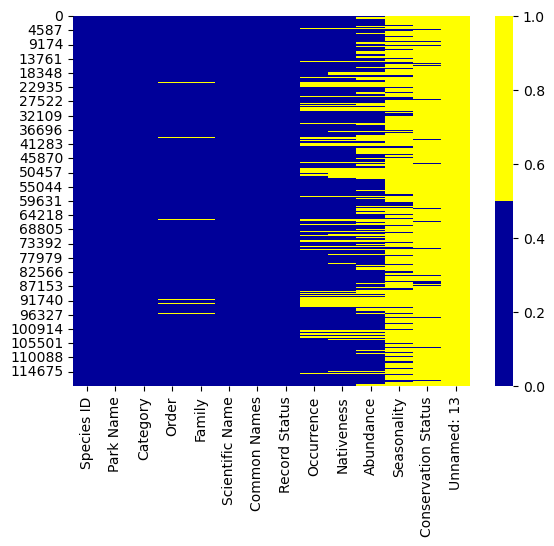

In [25]:
# Plotting a heatmap of any missing data to get a visual of which columns have the most missing data.

species_cols = species.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(species[species_cols].isnull(), cmap=sns.color_palette(colours))

created missing indicator for: Order
created missing indicator for: Family
created missing indicator for: Occurrence
created missing indicator for: Nativeness
created missing indicator for: Abundance
created missing indicator for: Seasonality
created missing indicator for: Conservation Status
created missing indicator for: Unnamed: 13


<Axes: xlabel='index'>

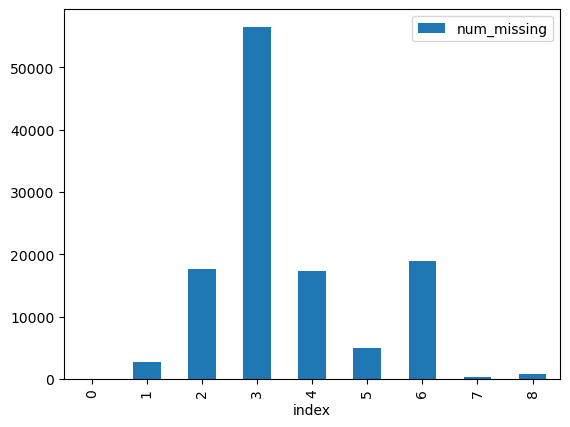

In [26]:
# Plotting a missing data histogram

for col in species.columns:
    missing = species[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        species['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in species.columns if 'ismissing' in col]
species['num_missing'] = species[ismissing_cols].sum(axis=1)

species['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

<Axes: >

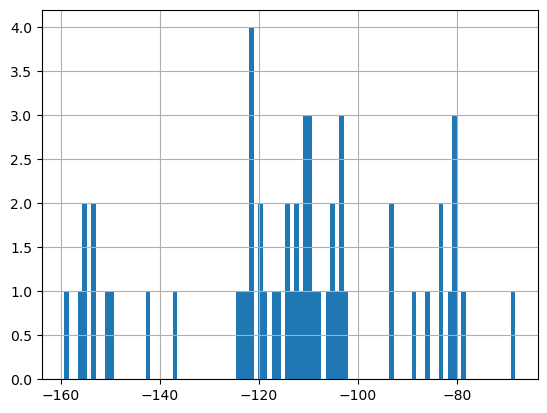

In [27]:
# Plotting a histogram to see if there are any outliers in the geographical location of the parks. 

parks['Longitude'].hist(bins=100)

<Axes: >

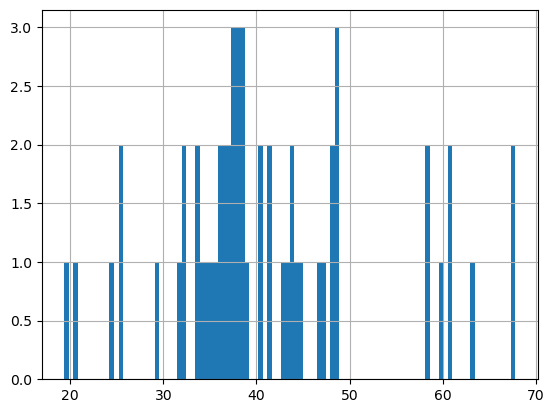

In [28]:
# Plotting a histogram to see if there are any outliers in the geographical location of the parks. 

parks['Latitude'].hist(bins=100)

<Axes: xlabel='Longitude', ylabel='Latitude'>

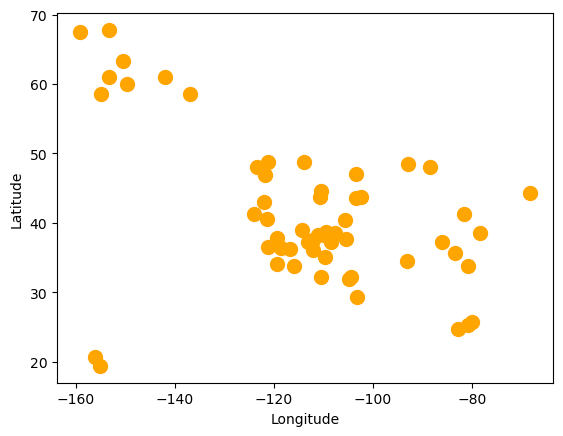

In [29]:
# Visualizing the parks as they are represented on a map (X axis = longitude, Y axis = latitide)

parks.plot.scatter(x="Longitude", y="Latitude", color="orange", s=100)

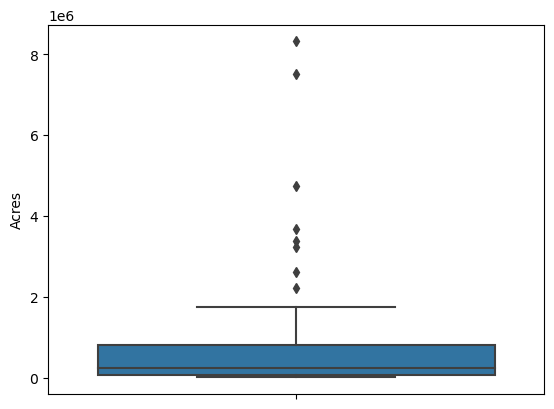

In [30]:
# Checking outliers in the parks dataset by acreage.

sns.boxplot(y=parks["Acres"]);
plt.show()

# Looks like there are quite a few parks that are significantly larger than the others. 

In [31]:
parks[parks['Acres'] > 2000000].head(10)

,Park Code,Park Name,State,Acres,Latitude,Longitude
14,DENA,Denali National Park and Preserve,AK,3372402,63.33,-150.50
15,DEVA,Death Valley National Park,"CA, NV",4740912,36.24,-116.82
18,GAAR,Gates Of The Arctic National Park and Preserve,AK,7523898,67.78,-153.30
20,GLBA,Glacier Bay National Park and Preserve,AK,3224840,58.50,-137.00
32,KATM,Katmai National Park and Preserve,AK,3674530,58.50,-155.00
35,LACL,Lake Clark National Park and Preserve,AK,2619733,60.97,-153.42
52,WRST,Wrangell - St Elias National Park and Preserve,AK,8323148,61.00,-142.00
53,YELL,Yellowstone National Park,"WY, MT, ID",2219791,44.60,-110.50


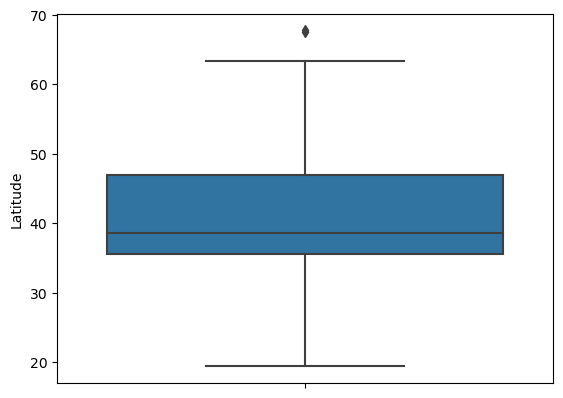

In [32]:
# Checking outliers in the parks dataset.

sns.boxplot(y=parks["Latitude"]);
plt.show()

# Looks like there are a couple parks located significantly more North than the rest of the parks.  

In [33]:
# Checking the Northern parks

parks[parks['Latitude'] > 65].head(10)

,Park Code,Park Name,State,Acres,Latitude,Longitude
18,GAAR,Gates Of The Arctic National Park and Preserve,AK,7523898,67.78,-153.30
34,KOVA,Kobuk Valley National Park,AK,1750717,67.55,-159.28


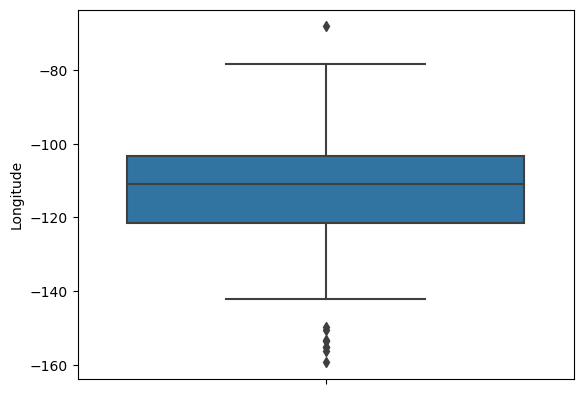

In [34]:
# Checking outliers in the parks dataset.

sns.boxplot(y=parks["Longitude"]);
plt.show()

# Looks like there are a couple parks that are located farther West than other parks, as well as a 
# handful of parks that are located significantly more East than other parks. 

In [35]:
# Checking the farthest Eastern parks.

parks[parks['Longitude'] > (-75)].head(10)

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21


In [36]:
# Checking the farthest Western parks.

parks[parks['Longitude'] < (-145)].head(10)

,Park Code,Park Name,State,Acres,Latitude,Longitude
14,DENA,Denali National Park and Preserve,AK,3372402,63.33,-150.50
18,GAAR,Gates Of The Arctic National Park and Preserve,AK,7523898,67.78,-153.30
27,HALE,Haleakala National Park,HI,29094,20.72,-156.17
28,HAVO,Hawaii Volcanoes National Park,HI,323431,19.38,-155.20
32,KATM,Katmai National Park and Preserve,AK,3674530,58.50,-155.00
33,KEFJ,Kenai Fjords National Park,AK,669983,59.92,-149.65
34,KOVA,Kobuk Valley National Park,AK,1750717,67.55,-159.28
35,LACL,Lake Clark National Park and Preserve,AK,2619733,60.97,-153.42


## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 

I was surprised to find so many null values in the species dataset. I'll have to fill in a lot of missing data since I will not be able to impute the values, given the dataset I'm working with. Luckily some of the columns with a lot of missing data will be deleted due to be unnecessary to my business question. 

I was also surprised to find that 51 rows of the Species dataset contained misaligned data (i.e., the data do not align properly to their respective columns).

2. Do you have any concerns about your dataset? 

I have no concerns about the Parks dataset. It appears to be relatively complete and valid. 

I have mild concerns about the Species dataset given the aforementioned misalignment of rows. I also have some concerns about the amount of missing data in the Species dataset. I'll have to note the limitations of the dataset and interpret my results with caution. 

I'm also concerned that the datasets are somewhat outdated. I'll have to note this limitation in my presentation. 

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

Most of my cleaning will be spent accounting for the misaligned data and the missing data. I do not plan on doing anything with the "outliers" as they should not be dismissed. I do not have duplicates to consider. I'll remove some unnecessary columns as well. 